In [1]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
import string
import warnings
import contractions
import spacy
from tqdm.notebook import tqdm_notebook
import numpy as np

In [2]:
# load a trained English pipeline 
nlp = spacy.load("en_core_web_sm")

# initiate tqdm for pandas.apply() functions
tqdm_notebook.pandas()

In [3]:

# suppress all warnings
warnings.simplefilter('ignore')

# expand notebook display options for dataframes
pd.set_option('display.max_colwidth', 200)
pd.options.display.max_columns = 999
pd.options.display.max_rows = 300

In [222]:
df = pd.read_csv('Reviews.csv')

In [223]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."


In [224]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [225]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [226]:
df.shape

(568454, 10)

In [227]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [228]:
df.dropna(inplace=True)

In [229]:
df.shape

(568411, 10)

In [230]:
#Since only this matters
tdf = df[['Id','ProductId','Score', 'Summary', 'Text']]

In [231]:
tdf

,Id,ProductId,Score,Summary,Text
0,1,B001E4KFG0,5,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...
1,2,B00813GRG4,1,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo""."
2,3,B000LQOCH0,4,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ..."
3,4,B000UA0QIQ,2,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...
4,5,B006K2ZZ7K,5,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal."
...,...,...,...,...,...
568449,568450,B001EO7N10,5,Will not do without,Great for sesame chicken..this is a good if not better than resturants I have eaten at..My husband loved it..will find other recipes to use this in..
568450,568451,B003S1WTCU,2,disappointed,"I'm disappointed with the flavor. The chocolate notes are especially weak. Milk thickens it but the flavor still disappoints. This was worth a try but I'll never buy again. I will use what's left,..."
568451,568452,B004I613EE,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 of those in one training session. I tried to train our dog with ""Ceaser dog treats"", it just made our puppy hyper. If you compare the ingredients, y..."
568452,568453,B004I613EE,5,Favorite Training and reward treat,These are the BEST treats for training and rewarding your dog for being good while grooming. Lower in calories and loved by all the doggies. Sweet potatoes seem to be their favorite Wet Noses tr...


In [232]:
tdf['Summary'].head(10)

0                            Good Quality Dog Food
1                                Not as Advertised
2                            "Delight" says it all
3                                   Cough Medicine
4                                      Great taffy
5                                       Nice Taffy
6    Great!  Just as good as the expensive brands!
7                           Wonderful, tasty taffy
8                                       Yay Barley
9                                 Healthy Dog Food
Name: Summary, dtype: object

In [233]:
tdf.nunique()

Id           568411
ProductId     74258
Score             5
Summary      295736
Text         393565
dtype: int64

### <span style='color:red'>Asking Akshay</span> 
Is this important, since it indicates that there are multiple repeated reviews

In [234]:
tdf = tdf.drop_duplicates(subset=['Text'],keep='first')

In [235]:
tdf.shape

(393565, 5)

In [236]:
tdf.nunique()

Id           393565
ProductId     67554
Score             5
Summary      294693
Text         393565
dtype: int64

In [237]:
tdf = tdf.reset_index(drop=True)

In [238]:
tdf['ProductId'].value_counts().reset_index(name='count').head(10)

,index,count
0,B007JFMH8M,909
1,B002QWP89S,630
2,B003B3OOPA,622
3,B001EO5Q64,565
4,B0013NUGDE,557
5,B000KV61FC,556
6,B000UBD88A,542
7,B000NMJWZO,542
8,B005K4Q37A,541
9,B0090X8IPM,530


In [239]:
import random
def printRandom(df_printRandom,n=10):
    for i in random.sample(range(0, len(df_printRandom)), n):
        print(i,' - ',df_printRandom['Text'][i],'\n')
printRandom(tdf)

169317  -  Compared to other gluten-free or 100% rice pasta this pasta is lacking. The pasta is easy to overcook and even when cooked al dente, the pasta crumbles and falls apart easily. I really enjoy eating pasta that isn't in a million pieces and is easy to cook - this just doesn't pass my gluten-free test. Not overcooking is the key for this pasta, but there are better pastas out there I would rather spend my money on. 

52494  -  This is the best tasting type of gluten-free cornflakes on the market. Even if you are not gluten-free, it is great- everyone in our family likes it and prefers it to any other brand, gluten-free or not.<br />I used to buy it at Whole Foods, and they stopped carrying it. Instead, they're now carrying a fruit juice sweetened variety which is made by the same company and it is not nearly as good. They offered that I might possibly get it from Amazon now, and I was happy to find it here.<br />I will be happy to continue buying it from Amazon. We use it all t

### Types of operations required:
Lower case conversion
HTML elements removal ushc as <br>
Extra full stops
Slangs conversion
Expanding contractions such as don't -> do not

### <span style='color:red'>Asking Akshay</span> 
How to process a text which describes a story and some people are also giving recepies <br>
treating this kind of text "pod/cup/premeasured" - 153838 <br>
anise/licorice - 179425 <br>
UPDATE ON REVIEW - 153838 - this will probably be the focus when modeling <br>


In [240]:
tdf['Text'] = tdf['Text'].apply(lambda x: x.lower())
tdf['Summary'] = tdf['Summary'].apply(lambda x: x.lower())

In [242]:
# code for cleaning slangs
# credit: https://github.com/misha345a/E-commerce_Reviews_Classifier/blob/main/ASBA.ipynb

def clean_slang(text): 
    """
    Correct common slang and abbreviations
    """
    text = re.sub(r"\babt?\b", "about", text)
    text = re.sub(r"\brll?y\b", "really", text)
    text = re.sub(r"\bso{2,}\b", "so", text)
    text = re.sub(r"\bmed\b", "medium", text)
    text = re.sub(r"\bxx?s\b", "extra small", text)
    text = re.sub(r"\bxx?l\b", "extra large", text)
    text = re.sub(r"\bfab\b", "fabulous", text)
    text = re.sub(r"\bblk\b", "black", text)
    text = re.sub(r"\bpromo\b", "promotion", text)
    text = re.sub(r"\btts\b", "true to size", text)
    text = re.sub(r"\blbs?\b", "pounds", text)
    text = re.sub(r"\brn\b", "right now", text)
    text = re.sub(r"\bwanna\b", "want to", text)
    text = re.sub(r"\besp\b", "especially", text)
    text = re.sub(r"\bgonn[ao]\b", "going to", text)
    text = re.sub(r"\btho\b", "though", text)
    text = re.sub(r"altho ", "although ", text)
    text = re.sub(r"prolly", "probably", text)
    text = re.sub(r"asap", "as soon as possible", text)
    text = re.sub(r"\bbc|b/c\b", "because", text)
    text = re.sub(r"\bavail\b", "available", text)
    text = re.sub(r"\bdiff\b", "different", text)
    text = re.sub(r"\bnxt|enxt\b", "next", text)
    text = re.sub(r" w/ ", " with ", text)
    text = re.sub(r"\bdidn ", "didn't ", text)
    text = re.sub(r" dnt ", " don't ", text)
    text = re.sub(r"\bsnd\b", "send", text)
    text = re.sub(r"b4\b", "before", text)
    text = re.sub(r"\batm\b", "at the moment", text)
    text = re.sub(r"\besp\b", "especially", text)
    text = re.sub(r"\bavg\b", "average", text)
    text = re.sub(r"\.{2,}", ". ", text)
    text = re.sub(r"[\\-]", ' ', text)
    text = re.sub(r"\s{2,}", " ", text).strip() 

    return text

def clean_html_tags(text):
    TAG_RE = re.compile(r'<[^>]+>')
    return TAG_RE.sub('', text)

In [243]:
tdf['Text'] = tdf['Text'].progress_apply(clean_slang)

  0%|          | 0/393565 [00:00<?, ?it/s]

In [244]:
tdf['Text'] = tdf['Text'].progress_apply(clean_html_tags)

  0%|          | 0/393565 [00:00<?, ?it/s]

In [245]:
tdf.head()

,Id,ProductId,Score,Summary,Text
0,1,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labr...
1,2,B00813GRG4,1,not as advertised,"product arrived labeled as jumbo salted peanuts. the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as ""jumbo""."
2,3,B000LQOCH0,4,"""delight"" says it all","this is a confection that has been around a few centuries. it is a light, pillowy citrus gelatin with nuts in this case filberts. and it is cut into tiny squares and then liberally coated with pow..."
3,4,B000UA0QIQ,2,cough medicine,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda. the flav...
4,5,B006K2ZZ7K,5,great taffy,"great taffy at a great price. there was a wide assortment of yummy taffy. delivery was very quick. if your a taffy lover, this is a deal."


In [246]:
def cont_expand(text):
    expanded_text = contractions.fix(text, slang=False)
    return expanded_text

# expand contractions
tdf['Text'] = tdf['Text'].apply(cont_expand)

In [41]:
printRandom(tdf,5)

22551  -  maybe i am the only one, but i give my dogs pig ears to keep them occupied for a while. it takes both of them a good 5 10 minutes to eat one. but i know they are not the healthiest thing on the planet, so when these better than ears came out, of course i tried them. both of my dogs love them, but they can eat one in about 30 seconds, defeating the purpose of a chew type treat. for the price, i would rather just buy them regular dog biscuits that are eaten in the same amount of time. that being said, the amazon price is much cheaper than any in store local price i have seen. maybe these are better for small dogs that cannot devour them so quickly, but my 70 pounders eat them like they are a regular old dog biscuit. 

250373  -  absolutely love this tea. the flavor is very balanced and would recommend this to everyone. i cannot wait to try this ny's other teas. 

43095  -  i am an er doctor and work long hours sometimes day shifts and sometimes night shifts. i have always strug

In [42]:
#cleaning the digits
tdf['Text']=tdf['Text'].apply(lambda x: re.sub('\w*\d\w*','', x))

In [43]:
tdf

,Id,ProductId,Score,Summary,Text
0,1,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labr...
1,2,B00813GRG4,1,not as advertised,"product arrived labeled as jumbo salted peanuts. the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as ""jumbo""."
2,3,B000LQOCH0,4,"""delight"" says it all","this is a confection that has been around a few centuries. it is a light, pillowy citrus gelatin with nuts in this case filberts. and it is cut into tiny squares and then liberally coated with pow..."
3,4,B000UA0QIQ,2,cough medicine,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda. the flav...
4,5,B006K2ZZ7K,5,great taffy,"great taffy at a great price. there was a wide assortment of yummy taffy. delivery was very quick. if your a taffy lover, this is a deal."
...,...,...,...,...,...
393560,568450,B001EO7N10,5,will not do without,great for sesame chicken. this is a good if not better than resturants i have eaten at. my husband loved it. will find other recipes to use this in.
393561,568451,B003S1WTCU,2,disappointed,i am disappointed with the flavor. the chocolate notes are especially weak. milk thickens it but the flavor still disappoints. this was worth a try but i will never buy again. i will use what is l...
393562,568452,B004I613EE,5,perfect for our maltipoo,"these stars are small, so you can give of those in one training session. i tried to train our dog with ""ceaser dog treats"", it just made our puppy hyper. if you compare the ingredients, you will..."
393563,568453,B004I613EE,5,favorite training and reward treat,these are the best treats for training and rewarding your dog for being good while grooming. lower in calories and loved by all the doggies. sweet potatoes seem to be their favorite wet noses treat!


In [44]:
t2df = tdf.copy(deep=True)

In [45]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
required_punctuations = '!"#$%&\'()*+,-/:;<=>?@[\\]^_`{|}~'
t2df['Text']=t2df['Text'].apply(lambda x: re.sub('[%s]' % re.escape(required_punctuations), '', x))

In [47]:
tdf.head()

,Id,ProductId,Score,Summary,Text
0,1,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labr...
1,2,B00813GRG4,1,not as advertised,"product arrived labeled as jumbo salted peanuts. the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as ""jumbo""."
2,3,B000LQOCH0,4,"""delight"" says it all","this is a confection that has been around a few centuries. it is a light, pillowy citrus gelatin with nuts in this case filberts. and it is cut into tiny squares and then liberally coated with pow..."
3,4,B000UA0QIQ,2,cough medicine,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered (which was good) and made some cherry soda. the flav...
4,5,B006K2ZZ7K,5,great taffy,"great taffy at a great price. there was a wide assortment of yummy taffy. delivery was very quick. if your a taffy lover, this is a deal."


### Calculating the average length of reviews

In [48]:
np.mean(tdf["Text"].apply(lambda x: np.sum([len(w) for w in x.split()])))

343.6151232960248

In [49]:
t2df['Text'] = t2df['Text'].astype(str)

In [50]:
t2df

,Id,ProductId,Score,Summary,Text
0,1,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labr...
1,2,B00813GRG4,1,not as advertised,product arrived labeled as jumbo salted peanuts. the peanuts were actually small sized unsalted. not sure if this was an error or if the vendor intended to represent the product as jumbo.
2,3,B000LQOCH0,4,"""delight"" says it all",this is a confection that has been around a few centuries. it is a light pillowy citrus gelatin with nuts in this case filberts. and it is cut into tiny squares and then liberally coated with powd...
3,4,B000UA0QIQ,2,cough medicine,if you are looking for the secret ingredient in robitussin i believe i have found it. i got this in addition to the root beer extract i ordered which was good and made some cherry soda. the flavor...
4,5,B006K2ZZ7K,5,great taffy,great taffy at a great price. there was a wide assortment of yummy taffy. delivery was very quick. if your a taffy lover this is a deal.
...,...,...,...,...,...
393560,568450,B001EO7N10,5,will not do without,great for sesame chicken. this is a good if not better than resturants i have eaten at. my husband loved it. will find other recipes to use this in.
393561,568451,B003S1WTCU,2,disappointed,i am disappointed with the flavor. the chocolate notes are especially weak. milk thickens it but the flavor still disappoints. this was worth a try but i will never buy again. i will use what is l...
393562,568452,B004I613EE,5,perfect for our maltipoo,these stars are small so you can give of those in one training session. i tried to train our dog with ceaser dog treats it just made our puppy hyper. if you compare the ingredients you will know...
393563,568453,B004I613EE,5,favorite training and reward treat,these are the best treats for training and rewarding your dog for being good while grooming. lower in calories and loved by all the doggies. sweet potatoes seem to be their favorite wet noses treat


In [51]:
# %%timeit -n 10
# SPlitting with resepct to full stop
rule = r"(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s"
t2df.loc[:,'Text'] = t2df.loc[:,"Text"].apply(lambda x: re.split(rule, x))

In [52]:
t2df

,Id,ProductId,Score,Summary,Text
0,1,B001E4KFG0,5,good quality dog food,"[i have bought several of the vitality canned dog food products and have found them all to be of good quality., the product looks more like a stew than a processed meat and it smells better., my l..."
1,2,B00813GRG4,1,not as advertised,"[product arrived labeled as jumbo salted peanuts., the peanuts were actually small sized unsalted., not sure if this was an error or if the vendor intended to represent the product as jumbo.]"
2,3,B000LQOCH0,4,"""delight"" says it all","[this is a confection that has been around a few centuries., it is a light pillowy citrus gelatin with nuts in this case filberts., and it is cut into tiny squares and then liberally coated with p..."
3,4,B000UA0QIQ,2,cough medicine,"[if you are looking for the secret ingredient in robitussin i believe i have found it., i got this in addition to the root beer extract i ordered which was good and made some cherry soda., the fla..."
4,5,B006K2ZZ7K,5,great taffy,"[great taffy at a great price., there was a wide assortment of yummy taffy., delivery was very quick., if your a taffy lover this is a deal.]"
...,...,...,...,...,...
393560,568450,B001EO7N10,5,will not do without,"[great for sesame chicken., this is a good if not better than resturants i have eaten at., my husband loved it., will find other recipes to use this in.]"
393561,568451,B003S1WTCU,2,disappointed,"[i am disappointed with the flavor., the chocolate notes are especially weak., milk thickens it but the flavor still disappoints., this was worth a try but i will never buy again., i will use what..."
393562,568452,B004I613EE,5,perfect for our maltipoo,"[these stars are small so you can give of those in one training session., i tried to train our dog with ceaser dog treats it just made our puppy hyper., if you compare the ingredients you will k..."
393563,568453,B004I613EE,5,favorite training and reward treat,"[these are the best treats for training and rewarding your dog for being good while grooming., lower in calories and loved by all the doggies., sweet potatoes seem to be their favorite wet noses t..."


In [53]:
t2df = t2df.explode("Text", ignore_index=True)

In [54]:
t2df

,Id,ProductId,Score,Summary,Text
0,1,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality.
1,1,B001E4KFG0,5,good quality dog food,the product looks more like a stew than a processed meat and it smells better.
2,1,B001E4KFG0,5,good quality dog food,my labrador is finicky and she appreciates this product better than most.
3,2,B00813GRG4,1,not as advertised,product arrived labeled as jumbo salted peanuts.
4,2,B00813GRG4,1,not as advertised,the peanuts were actually small sized unsalted.
...,...,...,...,...,...
1885818,568452,B004I613EE,5,perfect for our maltipoo,sweet potato flavor also did not make my hand smell like dog food.
1885819,568453,B004I613EE,5,favorite training and reward treat,these are the best treats for training and rewarding your dog for being good while grooming.
1885820,568453,B004I613EE,5,favorite training and reward treat,lower in calories and loved by all the doggies.
1885821,568453,B004I613EE,5,favorite training and reward treat,sweet potatoes seem to be their favorite wet noses treat


In [55]:
t2df.to_csv('Processed Reviews.csv')

#### <span style='color:red'> Left to be done </span>
#### autocorrect any misspelled words (takes about ~20 minutes)
from autocorrect import Speller

spell_check = Speller(lang='en')

dataset['Review Text'] = dataset['Review Text'].progress_apply(lambda x: spell_check(str(x)))

## <span style='color:green;'> Sentiment Extraction </span>

In [208]:
t2df['Score'].value_counts(normalize=True)*100

5    60.260034
4    15.363641
1     9.947030
3     8.540097
2     5.889198
Name: Score, dtype: float64

Since more than 75% of the reviews seems to be positive

first try binary classification <br>
assigning ratings to two calsses <br>
Ratings 4,5 -> 1 <br>
Ratings 1,2,3 -> 0 <br>

In [212]:
t2df['Rating'] = t2df['Score'].progress_apply(lambda x: 1 if x>3 else 0)

  0%|          | 0/1875213 [00:00<?, ?it/s]

In [213]:
t2df.head()

,ProductId,Score,Summary,Text,Rating
0,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality.,1
1,B001E4KFG0,5,good quality dog food,the product looks more like a stew than a processed meat and it smells better.,1
2,B001E4KFG0,5,good quality dog food,my labrador is finicky and she appreciates this product better than most.,1
3,B00813GRG4,1,not as advertised,product arrived labeled as jumbo salted peanuts.,0
4,B00813GRG4,1,not as advertised,the peanuts were actually small sized unsalted.,0


 
### <span style='color:red'> Wordcloud with an image mask </span> <br>
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np

#### Implementation of the function
def show_word_cloud(df, img_mask_path, fig_size=(20, 7)):

#### Create the color mask
  img_color_mask = np.array(Image.open(img_mask_path))
  
#### Get all the text 
  text = df.tweet.tolist() 

#### join the list and lowercase all the words
  text = ' '.join(text).lower()

  #create the wordcloud object by 
  """
  - removing stopwords
  - changing the background color to white
  - using the image as final mask
  """
  wordcloud = WordCloud(stopwords = STOPWORDS, 
                        background_color='white',
                        mask = img_color_mask).generate(text)

#### Configure for a bigger image size
  plt.figure(figsize = fig_size)
  plt.axis('off')
  plt.imshow(wordcloud)
  
#### Apply it to President Joe Biden Image and Tweets
bide_img_path = "joeBiden.png"
show_word_cloud(biden_tweet_df, bide_img_path)

In [217]:
%%capture
!pip install spacytextblob

In [218]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [225]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

'the product looks more like a stew than a processed meat and it smells better.'

In [226]:
text = t2df['Text'][1]
text

'the product looks more like a stew than a processed meat and it smells better.'

In [228]:
nlp(text)._.blob.polarity

0.5

In [231]:
t2df['Polarity'] = t2df['Text'].progress_apply(lambda x: nlp(x)._.blob.polarity)

  0%|          | 0/1875213 [00:00<?, ?it/s]

In [232]:
t2df.head()

,ProductId,Score,Summary,Text,Rating,Polarity
0,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality.,1,0.350
1,B001E4KFG0,5,good quality dog food,the product looks more like a stew than a processed meat and it smells better.,1,0.500
2,B001E4KFG0,5,good quality dog food,my labrador is finicky and she appreciates this product better than most.,1,0.500
3,B00813GRG4,1,not as advertised,product arrived labeled as jumbo salted peanuts.,0,0.000
4,B00813GRG4,1,not as advertised,the peanuts were actually small sized unsalted.,0,0.075


In [233]:
t2df.to_csv('Reviews_processed_polarity.csv')

In [234]:
t2df.head()

,ProductId,Score,Summary,Text,Rating,Polarity
0,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality.,1,0.350
1,B001E4KFG0,5,good quality dog food,the product looks more like a stew than a processed meat and it smells better.,1,0.500
2,B001E4KFG0,5,good quality dog food,my labrador is finicky and she appreciates this product better than most.,1,0.500
3,B00813GRG4,1,not as advertised,product arrived labeled as jumbo salted peanuts.,0,0.000
4,B00813GRG4,1,not as advertised,the peanuts were actually small sized unsalted.,0,0.075


In [246]:
# t = random.sample(range(0, len(t2df)), 10)
# t2df.iloc[t]

,ProductId,Score,Summary,Text,Rating,Polarity
776570,B0000DGF9V,3,"misleading description, but nice plant.",they like regular water and the same light conditions day after day.,0,0.133333
137554,B000DZFMEQ,5,great as usual,this one is no exception.,1,0.000000
1636044,B00066CX94,3,merrick gourmet cat food,but i am glad i went to amazon because the price was much better than anywhere else.br thanks for being there and i know i will be shopping at amazon again in the near future.br br deborah tinsley,0,0.325000
502513,B005K4Q37A,2,big dissapointment,yes i can taste the hazelnut but smell it more than taste it.,0,0.500000
1631337,B000DZDJ0K,5,best gf pancake mix around,before several of us had to go gf i used to make pancakes from scratch.,1,0.000000
790709,B000SAPX7W,1,worst rip off ever,this tea is a rip off is not oz and tastes terrible.,0,-1.000000
1697821,B0001JXBCO,3,too expensive,this is hulled barley the hull is left on and must cook longer than pearl barley but the end result is better nutrition.,0,0.250000
89070,B000084ETV,1,terrible and dangerous to feed,they are still recommending canidae als as a star star being the highest rating premium food to feed with the caveate however from a position of being a product about which dfa heard very few com...,0,0.408000
461614,B004OVWQDA,5,"why bother with others, save yourself the trouble and get taste nirvana!",i am excited to try this in smoothies or popsicles now,1,0.375000
1533159,B003OB0JHG,5,maruchan instant lunch cheddar cheese flavor delicious,this will be a short comment.,1,0.000000


In [248]:
t2df.head(10)

,ProductId,Score,Summary,Text,Rating,Polarity
0,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality.,1,0.350
1,B001E4KFG0,5,good quality dog food,the product looks more like a stew than a processed meat and it smells better.,1,0.500
2,B001E4KFG0,5,good quality dog food,my labrador is finicky and she appreciates this product better than most.,1,0.500
3,B00813GRG4,1,not as advertised,product arrived labeled as jumbo salted peanuts.,0,0.000
4,B00813GRG4,1,not as advertised,the peanuts were actually small sized unsalted.,0,0.075
5,B00813GRG4,1,not as advertised,not sure if this was an error or if the vendor intended to represent the product as jumbo.,0,-0.250
6,B000LQOCH0,4,"""delight"" says it all",this is a confection that has been around a few centuries.,1,-0.200
7,B000LQOCH0,4,"""delight"" says it all",it is a light pillowy citrus gelatin with nuts in this case filberts.,1,0.400
8,B000LQOCH0,4,"""delight"" says it all",and it is cut into tiny squares and then liberally coated with powdered sugar.,1,0.000
9,B000LQOCH0,4,"""delight"" says it all",and it is a tiny mouthful of heaven.,1,0.000


### <span style='color:red;'> To Do </span>

Group by product ID

In [252]:
t2df.groupby(['ProductId'])['Polarity'].mean()

ProductId
0006641040    0.147968
141278509X    0.190179
2734888454   -0.017917
2841233731    0.404497
7800648702    0.112857
Name: Polarity, dtype: float64

In [255]:
#Just for checking the range of polarity
t2df.describe()

,Score,Rating,Polarity
count,1.875213e+06,1.875213e+06,1.875213e+06
mean,4.101005e+00,7.562368e-01,1.762558e-01
std,1.344842e+00,4.293516e-01,3.128505e-01
min,1.000000e+00,0.000000e+00,-1.000000e+00
25%,4.000000e+00,1.000000e+00,0.000000e+00
50%,5.000000e+00,1.000000e+00,1.047619e-01
75%,5.000000e+00,1.000000e+00,3.750000e-01
max,5.000000e+00,1.000000e+00,1.000000e+00


In [268]:
t2df[(t2df['Polarity']>0.5)].sample(10)

,ProductId,Score,Summary,Text,Rating,Polarity
1328452,B001EQ5GT4,4,sugar cane,great product.,1,0.800000
300178,B0028S7MC6,5,kellogg's granola w/raisins,this is a great nutritious cereal.,1,0.800000
1788085,B001EO5RZE,2,optimum rebound cereal doesn't rebound,it is a good thing there are not a lot of rasins since they are so sticky.,0,0.700000
496282,B0052T7U7U,1,not again,product is good.,0,0.700000
619460,B000H27MDE,5,great breadsticks!,best breadsticks ever with wonderful crunchy sesame flavor and fresh baked taste.,1,0.766667
623081,B001ECQBVA,4,my dh and i love these !!,i believe because they are listed as deluxe .,1,0.600000
1533759,B002GK0NFO,1,do not purchase,exceptionally fishy smellingbr .,0,0.666667
585522,B000F3OA7G,5,excellent product,best brand of pasta sauce i have tried.,1,1.000000
516860,B001BM3L8Y,5,exclellent,it is really perfect if you are on a budget since it sells most places for .,1,0.750000
993472,B001EO60QY,5,"so easy, so good.",this is as good as the shortbread i ate while living in northern england.,1,0.700000


In [270]:
t2df[(t2df['Polarity']<-0.5)].sample(10)

,ProductId,Score,Summary,Text,Rating,Polarity
1357272,B001BS66DK,5,wow!,he goes insane for them.,1,-1.00
168978,B000F6SNPS,4,great spicy & sweet tea!,i did see artificial flavors which i am suspicious about.,1,-0.60
442953,B006N3I69A,1,worst coffee tasted,i ordered boxes and cannot even give those away as people in the office also say it is terrible.,0,-1.00
1272710,B001E7654S,1,trash,this is stuff is crap.,0,-0.80
1547430,B005LM077I,1,arrived opened!,perhaps this was not the fault of the porridge but because the packaging was opened when i received it i felt like an idiot and threw it out i was not going to take any chances,0,-0.80
1047801,B000BF10IA,1,nasty!,horrible freakin taste.,0,-1.00
1715060,B002FBY3YG,1,disappointed!,they were very stale.,0,-0.65
1873539,B000FAIR46,1,the olives were rancid,we are terribly disappointed.,0,-0.75
703015,B005ATI9TK,2,item is ok but not great,this item was a bit of a disappointment.,0,-0.60
793160,B0033HPPIY,5,good coffee,i became shocked at the taste.,1,-0.70


In [271]:
%%capture
pip install transformers

### <span style='color:red'> HuggingFace Zero-shot classification <span>

We will be classifiying each review into <br>
1. Positive
2. Neutral
3. Negative

In [14]:
# %%capture
# !pip install --upgrade pandas

In [4]:
import pandas as pd
df = pd.read_csv('Reviews_processed_polarity.csv',index_col=0)

In [5]:
# %%capture
# !pip install transformers

In [8]:
import os
os.getcwd()

'C:\\Users\\visha\\Desktop\\Projects\\Amazon Reviews NLP'

In [43]:
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import softmax
import csv
import urllib.request
import torch
# Preprocess text (username and link placeholders)
def preprocess(text):
    new_text = []
 
 
    for t in text.split(" "):
        t = '@user' if t.startswith('@') and len(t) > 1 else t
        t = 'http' if t.startswith('http') else t
        new_text.append(t)
    return " ".join(new_text)

# Tasks:
# emoji, emotion, hate, irony, offensive, sentiment
# stance/abortion, stance/atheism, stance/climate, stance/feminist, stance/hillary

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"

tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [58]:
# download label mapping
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]

device = "cuda:0" if torch.cuda.is_available() else "cpu"

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL,max_length=512).to(device)
model.save_pretrained(MODEL)

text = "Good night 😊"
text = preprocess(text)



encoded_input = tokenizer(text, return_tensors='pt',max_length=512,truncation=True).to(device)

# input_ids = encoded_input.input_ids.cpu()
# attention_mask = encoded_input.attention_mask.cpu()
output = model(**encoded_input)

tensor([-2.4354,  0.5166,  2.2747], device='cuda:0')

In [45]:
scores = output[0][0].detach().cpu().numpy()
scores = softmax(scores)

# # T
# model = TFAutoModelForSequenceClassification.from_pretrained(MODEL)
# model.save_pretrained(MODEL)

# text = "Good night 😊"
# encoded_input = tokenizer(text, return_tensors='tf')
# output = model(encoded_input)
# scores = output[0][0].numpy()
# scores = softmax(scores)

ranking = np.argsort(scores)
ranking = ranking[::-1]
for i in range(scores.shape[0]):
    l = labels[ranking[i]]
    s = scores[ranking[i]]
    print(f"{i+1}) {l} {np.round(float(s), 4)}")

1) positive 0.8465
2) neutral 0.1459
3) negative 0.0076


nan

In [98]:
def sentiment_huggingface_roberts(text):
    try:
        encoded_input = tokenizer(text, return_tensors='pt',max_length=512,truncation=True).to(device)
        output = model(**encoded_input)
        scores = output[0][0].detach().cpu().numpy()
        scores = softmax(scores)
        ranking = np.argsort(scores)
        ranking = ranking[::-1]
    #     for i in range(scores.shape[0]):
    #         l = labels[ranking[i]]
    #         s = scores[ranking[i]]
    #         print(f"{i+1}) {l} {np.round(float(s), 4)}")
        return labels[ranking[0]]
    except:
        return float('NaN')

tdf = df.iloc[589000:590000]

In [99]:
%%time
tdf['Sentiment'] = tdf['Text'].progress_apply(lambda x: sentiment_huggingface_roberts(x))

  0%|          | 0/1000 [00:00<?, ?it/s]

Wall time: 8.73 s


In [59]:
df.iloc[589448]['Text']

'being a kind of semi solid that breaks up like crazy wherever pressure occurred during lift off  the cohesion is not stiff  it is not lava like it is got that recognizable moist aspect that gives it a cake like appeal though it ends up having a thicker texture than a cake would these are brownies afterall.br br honestly i marvel at both the taste  texture of the brownies made from this mix they are terrific  i would prefer these brownies to most others without a doubt  yes i am also including from scratch homemade when i say that the outcome produced in conjunction with this mix is close to the perfect balance for me of the major factors associated with the brownie experience namely a wonderful  chocolatey fudge taste a moist  just right chewy texture  importantly the repeatability of my being able to reproduce the result over  over each time i utilize the mix.br br that being said i cannot overstate the importance of that insulated metal pan to the delectably optimized outcome i have

In [9]:
tdf[tdf['Sentiment']=='negative'].groupby(['ProductId'])['Sentiment'].count().nlargest(n=10)

ProductId
B002LANN56    2
B0032RPLSY    2
B0000DGG8D    1
B0000V8IOE    1
B0001ES9FI    1
B00062XZEU    1
B0009AFL8C    1
B0009XPD64    1
B0009YUEG2    1
B000CI8O26    1
Name: Sentiment, dtype: int64

### <span style='color:red'> Trying multiprocessing </span> 

In [91]:
'''
Didn't work out
'''
# from joblib import Parallel
# import tqdm
# def batch_process_function(x):
    
#     return sentiment_huggingface_roberts(x['Text'])

# result = Parallel(n_jobs=6)(
#     delayed(sentiment_huggingface_roberts)
#     (row, order, None) 
#     for row in tqdm(tdf['Text'])
# )

"\nDidn't work out\n"

### <span style='color:red'> Applying cardiffnlp/twitter-roberta-base-sentiment to all full dataframe </span> 

In [100]:
df['Sentiment'] = df['Text'].progress_apply(lambda x: sentiment_huggingface_roberts(x))

  0%|          | 0/1872734 [00:00<?, ?it/s]

In [101]:
# df.to_csv('Reviews_huggingface_polarity.csv')

In [111]:
df.Sentiment.value_counts()

positive    871703
neutral     652929
negative    348102
Name: Sentiment, dtype: int64

In [112]:
df[df['Sentiment']=='negative'].groupby(['ProductId'])['Sentiment'].count().nlargest(n=10)

ProductId
B006MONQMC    970
B002LANN56    958
B001VJ0B0I    880
B0041NYV8E    802
B000KV61FC    790
B0090X8IPM    680
B002IEZJMA    662
B004CLCEDE    648
B004ZIER34    634
B005HG9ESG    605
Name: Sentiment, dtype: int64

### <span style='color:red'> Wordcloud Code </span> 

In [73]:
df = pd.read_csv('Reviews_huggingface_polarity.csv')

In [74]:
df.head()

,Review_Id,ProductId,Score,Summary,Text,Rating,Polarity,Sentiment
0,1,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality.,1,0.350,positive
1,1,B001E4KFG0,5,good quality dog food,the product looks more like a stew than a processed meat and it smells better.,1,0.500,positive
2,1,B001E4KFG0,5,good quality dog food,my labrador is finicky and she appreciates this product better than most.,1,0.500,positive
3,2,B00813GRG4,1,not as advertised,product arrived labeled as jumbo salted peanuts.,0,0.000,neutral
4,2,B00813GRG4,1,not as advertised,the peanuts were actually small sized unsalted.,0,0.075,neutral


In [133]:
## Wordcloud code 
from PIL import Image
import matplotlib.pyplot as plt 
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

STOPWORDS.update(['br','amazon'])
#### Implementation of the function
def show_word_cloud(base_df, img_mask_path, fig_size=(20, 7)):

    #### Create the color mask
    img_color_mask = np.array(Image.open(img_mask_path))

    ## Get all the text 
    text = base_df.Text.tolist() 

    #### join the list and lowercase all the words
    text = ' '.join(text).lower()

    #create the wordcloud object by 
    """
    - removing stopwords
    - changing the background color to white
    - using the image as final mask
    """
    wordcloud = WordCloud(stopwords = STOPWORDS, 
                        background_color='white',
                        mask = img_color_mask).generate(text)

    #### Configure for a bigger image size
    plt.figure(figsize = fig_size)
    plt.axis('off')
    plt.imshow(wordcloud)

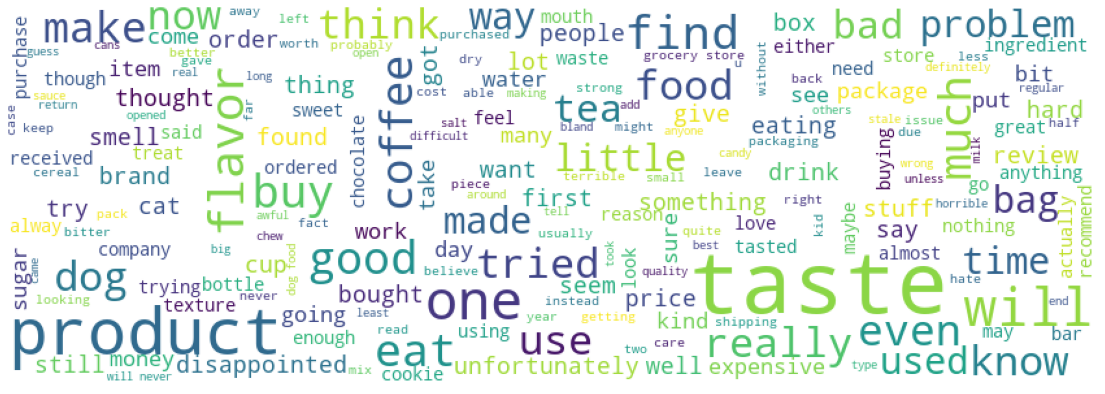

In [134]:
img_path = "amazon_logo2.png"
show_word_cloud(df[df['Sentiment'] == 'negative'], img_path)

In [42]:
tdf[tdf['Sentiment']=='negative'].groupby(['ProductId'])['Sentiment'].count().nlargest(n=10)

ProductId
B000FMZO8G    2
B000J41TB6    2
B001LG945O    2
B00004RAMY    1
B0000DBN1I    1
B0000DJDJZ    1
B0001ES9F8    1
B0001FR0BQ    1
B0002268MA    1
B0002EOW4E    1
Name: Sentiment, dtype: int64

In [125]:
df[df['Sentiment']=='negative'].sample(n=10)

,ProductId,Score,Summary,Text,Rating,Polarity,Sentiment
699822,B0012NUVN0,5,awesome!,he is never shown any sign of toy or food aggression before but boy he did not like when we took it away.br br i would say that after about of a month lab chewing on it it probably has a few more...,1,0.266667,negative
993093,B000GQ4P5O,5,love this popcorn!,i do end up pouring the oil into a measuring cup first and then into my kettle because it is a little awkward pouring it directly from the pouch to the kettle.,1,-0.109375,negative
1388347,B001E5E2AO,5,incredibly useful stuff,all the bullions i have tried including the penzeys weird soup base paste stuff taste mostly like msg and salt not beef.,1,-0.266667,negative
296250,B0026LIO9A,4,suitable for all types of cats,they all eat the iams dry food at will with no portion control.,1,-0.066667,negative
1114305,B0018CE6ZE,5,good for gsd,he stopped licking off his fur and he eats this up quickly.,1,0.333333,negative
1409611,B0006TVYWS,1,"not my cup of tea - and pass the rolaids, please...",i do not get it.,0,0.000000,negative
1641609,B003XDH6M6,3,crazy expensive,but i would not buy it again.,0,0.000000,negative
453116,B007EJ4GSW,1,not what i expected.,i could not give them as gifts and i will not be buying more,0,0.500000,negative
1097219,B000ILILM0,2,"not-so-great, in my opinion",i guess i am weird.,0,-0.500000,negative
526345,B001PO7FDU,4,expensive taste for not so much,i told my buddy and he was irate as he had spent app.,1,-0.100000,negative


In [9]:
sample_df = df.sample(n=100)

Long Term Goals
-> Give top 10 positive and negative reviews

-> Dashboard

-> Export CSV

-> Drag and drop filed for selecting product ID


<strike> Get back the review id </strike>

<strike> Get rid of the neutral sentiments </strike>


In [76]:
df = df[df.Sentiment != 'neutral']

In [77]:
sentiment_map = {'positive':1, 'negative':-1}
df['Sentiment_Value'] = df['Sentiment'].map(sentiment_map)
df.head()

,Review_Id,ProductId,Score,Summary,Text,Rating,Polarity,Sentiment,Sentiment_Value
0,1,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality.,1,0.35,positive,1
1,1,B001E4KFG0,5,good quality dog food,the product looks more like a stew than a processed meat and it smells better.,1,0.50,positive,1
2,1,B001E4KFG0,5,good quality dog food,my labrador is finicky and she appreciates this product better than most.,1,0.50,positive,1
5,2,B00813GRG4,1,not as advertised,not sure if this was an error or if the vendor intended to represent the product as jumbo.,0,-0.25,negative,-1
9,3,B000LQOCH0,4,"""delight"" says it all",and it is a tiny mouthful of heaven.,1,0.00,positive,1


In [81]:
columns_focus = ['Review_Id','ProductId','Sentiment_Value','Text']
tdf = df[columns_focus]

In [82]:
tdf

,Review_Id,ProductId,Sentiment_Value,Text
0,1,B001E4KFG0,1,i have bought several of the vitality canned dog food products and have found them all to be of good quality.
1,1,B001E4KFG0,1,the product looks more like a stew than a processed meat and it smells better.
2,1,B001E4KFG0,1,my labrador is finicky and she appreciates this product better than most.
5,2,B00813GRG4,-1,not sure if this was an error or if the vendor intended to represent the product as jumbo.
9,3,B000LQOCH0,1,and it is a tiny mouthful of heaven.
...,...,...,...,...
1872729,564350,B004I613EE,-1,sweet potato flavor also did not make my hand smell like dog food.
1872730,564351,B004I613EE,1,these are the best treats for training and rewarding your dog for being good while grooming.
1872731,564351,B004I613EE,1,lower in calories and loved by all the doggies.
1872732,564351,B004I613EE,1,sweet potatoes seem to be their favorite wet noses treat


In [143]:
kdf = pd.DataFrame(df.groupby(by=['ProductId','Review_Id'])['Sentiment_Value'].sum()).reset_index()

In [218]:
top_10_positive = kdf[kdf.groupby('ProductId')['Sentiment_Value'].rank(ascending=False) <= 10]
top_10_positive

,ProductId,Review_Id,Sentiment_Value
0,0006641040,149703,5
2,0006641040,149705,3
3,0006641040,149706,4
10,0006641040,149713,4
11,0006641040,149714,3
...,...,...,...
408050,B009SR4OQ2,220648,1
408051,B009UOFU20,1472,-1
408052,B009UOFU20,1473,-1
408053,B009WSNWC4,5683,3


In [257]:
top_10_negative = kdf[kdf.groupby('ProductId')['Sentiment_Value'].rank() <= 10]
top_10_negative

,ProductId,Review_Id,Sentiment_Value
4,0006641040,149707,-2
5,0006641040,149708,-1
9,0006641040,149712,-3
24,0006641040,149727,-1
35,0006641040,149738,-1
...,...,...,...
408050,B009SR4OQ2,220648,1
408051,B009UOFU20,1472,-1
408052,B009UOFU20,1473,-1
408053,B009WSNWC4,5683,3


In [258]:
top_10_postive.columns = ['ProductId','Id','Sentiment_Value']
pd.merge(top_10_postive,tdf[['Id','Text']],on='Id', how='inner').\
to_csv('Top10PositiveReviewsPerProduct.csv',index=False)

In [260]:
top_10_negative.columns = ['ProductId','Id','Sentiment_Value']
pd.merge(top_10_negative,tdf[['Id','Text']],on='Id', how='inner').\
to_csv('Top10NegativeReviewsPerProduct.csv',index=False)

### <span style='color:red;'> Tableau Dasboard in Making </span>

### <span style='color:red;'> Evaluate Huggingface Model </span>

In [278]:
evaluate_df = pd.read_csv('Reviews_huggingface_polarity.csv')
evaluate_df.head(5)

,Review_Id,ProductId,Score,Summary,Text,Rating,Polarity,Sentiment
0,1,B001E4KFG0,5,good quality dog food,i have bought several of the vitality canned dog food products and have found them all to be of good quality.,1,0.350,positive
1,1,B001E4KFG0,5,good quality dog food,the product looks more like a stew than a processed meat and it smells better.,1,0.500,positive
2,1,B001E4KFG0,5,good quality dog food,my labrador is finicky and she appreciates this product better than most.,1,0.500,positive
3,2,B00813GRG4,1,not as advertised,product arrived labeled as jumbo salted peanuts.,0,0.000,neutral
4,2,B00813GRG4,1,not as advertised,the peanuts were actually small sized unsalted.,0,0.075,neutral


In [298]:
def implode(df, column):
    keys = [c for c in df if c != column]
    return df.groupby(keys, as_index=False).agg({column: list})[df.columns]


def printRandom(df_printRandom,n=10):
    indexes = random.sample(range(0,df_printRandom['Review_Id'].nunique()), n)
    return df_printRandom[(df_printRandom['Review_Id'].isin(indexes))]
    


printRandom(evaluate_df)

,Review_Id,ProductId,Score,Summary,Text,Rating,Polarity,Sentiment
205526,45908,B001EO5QZK,5,vegan organic kosher choice,this review is out there for those for whom this makes a difference.,1,0.000000e+00,positive
205527,45908,B001EO5QZK,5,vegan organic kosher choice,see all of my reviews for more great choices.,1,6.500000e-01,positive
205528,45908,B001EO5QZK,5,vegan organic kosher choice,check out vegan grocery favorites and vegan grocery top ten in listmania.,1,2.500000e-01,positive
205529,45908,B001EO5QZK,5,vegan organic kosher choice,your helpful votes count and will be greatly appreciated to benefit the search of others.,1,2.000000e-01,positive
205530,45908,B001EO5QZK,5,vegan organic kosher choice,thank you.,1,0.000000e+00,positive
205531,45908,B001EO5QZK,4,its good!!,rolls eyes at other reviewer of course its going to smell like a campfire they roast the tea over pine and its awesome i love this tea but their suggestion of one teaspoon is a bit conservative fo...,1,3.697917e-01,positive
205532,45908,B001EO5QZK,5,decaf chai spiced loose tea,this is the only brand which i could find that sells decaf chai as loose leaf tea.,1,-3.846154e-02,positive
205533,45908,B001EO5QZK,5,decaf chai spiced loose tea,it is delicious also.,1,1.000000e+00,positive
205534,45908,B001EO5QZK,5,decent tea for a moderately picky tea lover,i am not a real connoisseur of loose teas but i do like decent black tea with no added flavors just loose black tea like indian or ceylon teas or maybe some blends like irish or english breakfast.,1,-5.256410e-02,positive
412052,95437,B003VIN0QE,2,"you can do better than this, pacific foods!",this soup is made with milk so i am guessing that was what caused the curds.,0,0.000000e+00,neutral


In [288]:
' '.join(evaluate_df[evaluate_df['Review_Id'] == 1]['Text'].values)

'i have bought several of the vitality canned dog food products and have found them all to be of good quality. the product looks more like a stew than a processed meat and it smells better. my labrador is finicky and she appreciates this product better than most.'

### <span style='color:red;'> Tableau Dasboard in Making </span>